## Introduction
### 왜 딥러닝인가  
 데이터의 양이 증가할 때, 머신러닝의 performance가 더 이상 많이 증가하지 않는 상황이 오지만, 딥러닝은 계속 증가한다.

### 머신러닝과 딥러닝의 차이는 무엇인가.  
- 머신러닝은 딥러닝을 포함한다.  
- 머신러닝에서는 feautres manually 주어지지만, 딥러닝에서는 데이터로부터 directly 하게 학습한다.

## Overview the Data Set

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

(-0.5, 63.5, 63.5, -0.5)

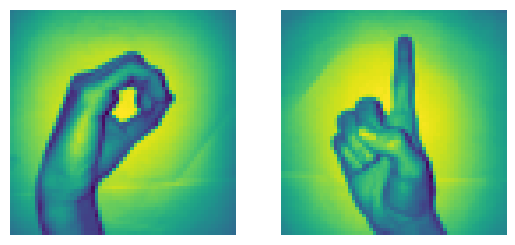

In [46]:
x_l=np.load('/content/drive/MyDrive/Euron/week2/X.npy')
y_l=np.load('/content/drive/MyDrive/Euron/week2/Y.npy')
img_size=64
plt.subplot(1,2,1)
plt.imshow(x_l[260].reshape(img_size,img_size))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')

`plt.subplot(x,y,x)` : x: 플롯을 포함할 행의 수, y: 플롯을 포함할 열의 수, z: 현재 활성화될 서브플롯의 위치

`reshape` : NumPy 라이브러리의 기능으로, 배열의 구조를 변경하지 않고, 주어진 차원으로 배열의 형태를 변경하는 데 사용

> 라벨이 붙어있는 데이터로 만들자

In [47]:
#너무 많으니 좀 뜯어오자
X=np.concatenate((x_l[204:409],x_l[822:1027]),axis=0)
#X의 0부터 204는 0인 사인, 205부터 410까지는 1인 사인.
z=np.zeros(205)
o=np.ones(205)

Y=np.concatenate((z,o),axis=0).reshape(X.shape[0],1) # 뒤에 reshape 안 붙이면, (410,)라고 뒤의 차원이 열려 있음
print("X shape: ", X.shape)
print("Y shape: ", Y.shape)
print(Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)
(410, 1)


`X.shape`: np에서 array의 차원이 궁금할 때

> X와 Y를 train, test sets로 나누자

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.15, random_state=42)
number_of_train=X_train.shape[0]
number_of_test=X_test.shape[0]

`random_state`를 잡는 이유: 다시 반복시켰을 때 같은 방식으로 나눌 수 있도록

- 데이터를 train, test 로 나누는 방법  
1) 라이브러리 불러오기
`from sklearn.model_selection import train_test_split`  
2) 코드 작성
`X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.15, random_state=42)`  
  
`random_state`를 잡는 이유: 다시 반복시켰을 때 같은 방식으로 나눌 수 있도록

> flatten 해주기

In [49]:
X_train_flatten=X_train.reshape(number_of_train, X_train.shape[1]*X_train.shape[2])
X_test_flatten=X_test.reshape(number_of_test, X_test.shape[1]* X_test.shape[2])
print("X train flatten", X_train_flatten.shape)
print("X test flatten", X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


 input array (X) 가 3차원이기 때문에 첫번째 딥러닝 모델의 input으로 넣어주기 위해서는 2차원으로 flatten 시켜 줘야 함  
   
 flatten한다는 의미는 각 픽셀의 이름을 읽어준다는 것.

> Transpose 해주기

In [50]:
#왜 전치 시키지?-> 필자가 하고 싶다고 함.
x_train=X_train_flatten.T
x_test=X_test_flatten.T
y_train=Y_train.T
y_test=Y_test.T
print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


## Logistic Regression

> logistic regression은 매우 간단한 형태의 neural network이다!

- 파라미터: weight, bias  
Weights: 각 pixels의 coefficient
Bias: intercept

- z = (w.t)x + b  
 => z = b + px1w1 + px2w2 + ... + px4096*w4096
y_head = sigmoid(z)  
 =>4096개의 픽셀이 모두 추론 하게 하는 변수로 들어감


- 마지막에 sigmoid function을 씌우는 이유는?  
  0과 1사이의 결과가 나오게 하기 위함.

> Initializing parameters

다양한 테크닉이 있지만 여기서는 기본적으로 weights는 0.01로, bias는 0으로 초기화하자

In [51]:
def initialize_weights_and_bias(dimension):
  w=np.full((dimension,1),0.01)
  b=0.0
  return w,b

`np.full((dimension,1),0.01)`: dimension x 1 크기의 배열을 생성-> 배열의 모든 요소를 0.01로 초기화

> Forward Propagation

In [52]:
# 시그모이드함수 정의
def sigmoid(z):
  y_head=1/(1+np.exp(-z))
  return y_head

In [53]:
# 순전파 정의
def forward_propagation(w,b,x_train, y_train):
  z=np.dot(w.T,x_train)+b #받아온 초기 w에 x곱하고 b 더해줌.
  y_head=sigmoid(z)
  loss=-y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head) #손실함수 정의하기
  cost=(np.sum(loss))/x_train.shape[1] #비용함수 정의
  return cost

> Optimization Algorighm with Gradient Descent

- cost를 줄이기 위해서는 임의로 잡인 weights와 bia를 update해줘야 함.
$$
w := w - \alpha \frac{\partial J(w,b)}{\partial w}
$$
여기서 $\alpha$는 하이퍼 파리미터라고 하기도 함.


- $z = w^Tx + b$
- $\hat{y} = a = \sigma(z)$           →           $\frac{da}{dz}=a(1-a)$
- $\mathcal{L}(a, y) = -(y \log(a) + (1 - y) \log(1 - a))$       
  -> $\frac{dL}{da} = \frac{-y}{a} + \frac{1 - y}{1 - a}$  
  -> $\frac{dL}{dz}=\frac{dL}{da} \times \frac{da}{dz}=a-y$

- 결론적으로 구하고 싶은 $\frac{dL}{dw}$과 $\frac{dL}{db}$ 를 Chain rule을 통해서 구하면 아래와 같다.                                      $\frac{dL}{dw}=x \times (a-y)$,    $\frac{dL}{db}=a-y$


In [54]:
#forward propagation 과 backward propagation 합쳐주기
def forward_backward_propagation(w,b,x_train, y_train):
  #forward propagation
  z=np.dot(w.T,x_train)+b
  y_head=sigmoid(z)
  loss=-y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
  cost=(np.sum(loss))/x_train.shape[1]

  #backward propagation
  derivative_weight=(np.dot(x_train, ((y_head-y_train).T)))/x_train.shape[1]
  derivative_bias=np.sum(y_head-y_train)/x_train.shape[1] #x_train.shape[1]로 나누는 것은 scaling을 위함4
  gradients={"derivative_weight": derivative_weight, "derivative_bias": derivative_bias} #딕셔너리로 넣어주기
  return cost, gradients

업데이트 하는 매 시점의 계산할 것들 계산하고 미분한 값까지 계산.

In [58]:
#updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate, number_of_iteration):
  cost_list=[]
  cost_list2=[]
  index=[]

  #number_of_iteration의 의미는 각 파라미터 업데이트하려는 횟수
  for i in range(number_of_iteration):
    cost, gradients=forward_backward_propagation(w,b,x_train, y_train)
    cost_list.append(cost) #기록해두기

    #파라미터 업데이트 해주기
    w=w-learning_rate*gradients["derivative_weight"]
    b=b-learning_rate*gradients["derivative_bias"]

    if i%10==0:
      cost_list2.append(cost)
      index.append(i) #10번의 한번 꼴로 손실함수 값 새롭게 기록해주기
      print ("Cost after iteration %i: %f" %(i, cost))


    #업데이트 끝!
  parameters={"weight": w, "bias": b} #마지막 업데이트 한 것 까지 반영
  plt.plot(index, cost_list2)
  plt.xticks(index, rotation='vertical')
  plt.xlabel("Number of Iteration")
  plt.ylabel("Cost")
  plt.show()
  return parameters, gradients, cost_list




> 이제 예측해보자!

In [56]:
#가지고 있는 파라미터들로 x_test의 y_test값을 예측해보자
def predict(w, b, x_test):
  z=sigmoid(np.dot(w.T,x_test)+b) #시그모이드 함수 넣어줘서 0-1 범위로 만들기
  Y_prediction=np.zeros((1, x_test.shape[1]))
  for i in range(z.shape[1]):
    if z[0,i]<=0.5:
      Y_prediction[0,i]=0
    else:
      Y_prediction[0,i]=1

  return Y_prediction


> 전체 함수를 만들어 정의 해보자

Cost after iteration 0: 14.014222
Cost after iteration 10: 2.544689
Cost after iteration 20: 2.577950
Cost after iteration 30: 2.397999
Cost after iteration 40: 2.185019
Cost after iteration 50: 1.968348
Cost after iteration 60: 1.754195
Cost after iteration 70: 1.535079
Cost after iteration 80: 1.297567
Cost after iteration 90: 1.031919
Cost after iteration 100: 0.737019
Cost after iteration 110: 0.441355
Cost after iteration 120: 0.252278
Cost after iteration 130: 0.205168
Cost after iteration 140: 0.196168


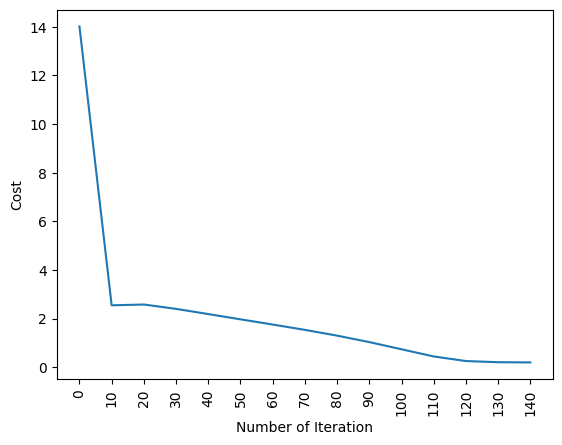

train accuracy: 92.816091954023 %
test accuracy: 93.54838709677419 %


In [59]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):
  #초기화
  dimension=x_train.shape[0]
  w,b=initialize_weights_and_bias(dimension)

  parameters, gradients, cost_list=update(w, b, x_train, y_train, learning_rate, num_iterations)

  y_prediction_test=predict(parameters["weight"],parameters["bias"],x_test)
  y_prediction_train=predict(parameters["weight"],parameters["bias"],x_train)

  #오차 출력으로 성능 평가
  print("train accuracy: {} %".format(100-np.mean(np.abs(y_prediction_train-y_train))*100))
  print("test accuracy: {} %".format(100-np.mean(np.abs(y_prediction_test-y_test))*100))

logistic_regression(x_train, y_train, x_test, y_test, learning_rate=0.01, num_iterations=150)


# Logistic Regression with Sklearn
라이브러리에 직접 정의하고 쓰지 않아도 되도록 정의해 두었음.

In [60]:
from sklearn import linear_model
logreg=linear_model.LogisticRegression(random_state=42, max_iter=150)
print("test accuracy: {}".format(logreg.fit(x_train.T, y_train.T).score(x_test.T,y_test.T)))
print("test accuracy: {}".format(logreg.fit(x_train.T, y_train.T).score(x_train.T,y_train.T)))


test accuracy: 0.967741935483871
test accuracy: 1.0
